In [8]:
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
import numpy as np

In [9]:
data=pd.read_csv('romans 2.csv')

In [26]:
data.head()

,Name,Birth,Succession,Reign,Time,Deaths
0,Augustus,"23 September 63 BC, Rome , Italia \n",Great-nephew and adopted son of Julius Caesa...,16 January 27 BC – 19 August 14 AD\n,"40 years, 7 months and 3 days\n",19 August 14 AD (aged 75) Natural causes \n
1,Tiberius,"16 November 42 BC, Rome , Italia \n","Natural son of Livia Drusilla , Augustus' th...",18 September 14 AD – 16 March 37 AD\n,"22 years, 5 months and 27 days\n",16 March 37 AD (aged 77) Probably natural cau...
2,Caligula,"31 August 12 AD, Antium , Italia \n",Great-nephew and adoptive grandson of Tiberiu...,18 March 37 AD – 24 January 41 AD\n,"3 years, 10 months and 6 days\n",24 January 41 AD (aged 28) Assassinated in a ...
3,Claudius,"1 August 10 BC, Lugdunum , Gallia Lugdunens...",Uncle of Caligula; brother of Germanicus; nep...,25/26 January 41 AD – 13 October 54 AD\n,"13 years, 8 months and 18/19 days\n",13 October 54 AD (aged 63) Probably poisoned ...
4,Nero,"15 December 37 AD, Antium , Italia \n","Great-nephew, stepson, son-in-law and adopted...",13 October 54 AD – 9 June 68 AD\n,"13 years, 7 months and 27 days\n",9 June 68 AD (aged 30) Committed suicide afte...


In [25]:
data['Name']=data['Name'].apply(lambda x: x.split()[0])

In [33]:
deaths=[]
for i in data.Deaths:
    if 'assassin' in i or 'murdered' in i or ('killed' in i and not 'battle' in i):
        deaths.append('Assassinated')
    elif 'natural' in i:
        deaths.append('Natural Causes')
    elif "suicide" in i:
        deaths.append("Suicide")
    elif "executed" in i or "beheaded" in i:
        deaths.append("Executed")
    elif "battle" in i:
        deaths.append("Killed in Battle")
    elif "poison" in i:
        deaths.append("Poisoned")      
    elif "unknown" in i or i[-2] == ")" or "constantinople" in i:
        deaths.append("Other/Unknown")
    elif "illness" in i:
        deaths.append("Illness")
    elif any(disease in i for disease in ["tuberculosis", "edema", "gout", 'carbuncle', 'dysentery', "epilepsy" ]):
        deaths.append("Illness")
    else:
        deaths.append("Other/Unknown")

In [39]:
temp=data.copy()
temp['Cause']=deaths

In [41]:
temp.head()

,Name,Birth,Succession,Reign,Time,Deaths,Cause
0,Augustus,"23 September 63 BC, Rome , Italia \n",Great-nephew and adopted son of Julius Caesa...,16 January 27 BC – 19 August 14 AD\n,"40 years, 7 months and 3 days\n",19 August 14 AD (aged 75) Natural causes \n,Other/Unknown
1,Tiberius,"16 November 42 BC, Rome , Italia \n","Natural son of Livia Drusilla , Augustus' th...",18 September 14 AD – 16 March 37 AD\n,"22 years, 5 months and 27 days\n",16 March 37 AD (aged 77) Probably natural cau...,Assassinated
2,Caligula,"31 August 12 AD, Antium , Italia \n",Great-nephew and adoptive grandson of Tiberiu...,18 March 37 AD – 24 January 41 AD\n,"3 years, 10 months and 6 days\n",24 January 41 AD (aged 28) Assassinated in a ...,Other/Unknown
3,Claudius,"1 August 10 BC, Lugdunum , Gallia Lugdunens...",Uncle of Caligula; brother of Germanicus; nep...,25/26 January 41 AD – 13 October 54 AD\n,"13 years, 8 months and 18/19 days\n",13 October 54 AD (aged 63) Probably poisoned ...,Natural Causes
4,Nero,"15 December 37 AD, Antium , Italia \n","Great-nephew, stepson, son-in-law and adopted...",13 October 54 AD – 9 June 68 AD\n,"13 years, 7 months and 27 days\n",9 June 68 AD (aged 30) Committed suicide afte...,Suicide


In [78]:
ages=[]
for i in data.Deaths:
    if 'age' in i:
        a=i.split('age',1)
        b=a[-1].split(')')
        c=b[0].split(' ')
        d=c[-1].split('-')
        e=d[0].split('~')
        f=e[-1].split('/')
        try:
            age=int(f[-1])
            ages.append(age)
        except:
            ages.append('Unknown')
            pass
    else:
        ages.append('Unknown')
temp['Age']=ages

In [80]:
temp.head()

,Name,Birth,Succession,Reign,Time,Deaths,Cause,Age
0,Augustus,"23 September 63 BC, Rome , Italia \n",Great-nephew and adopted son of Julius Caesa...,16 January 27 BC – 19 August 14 AD\n,"40 years, 7 months and 3 days\n",19 August 14 AD (aged 75) Natural causes \n,Other/Unknown,75
1,Tiberius,"16 November 42 BC, Rome , Italia \n","Natural son of Livia Drusilla , Augustus' th...",18 September 14 AD – 16 March 37 AD\n,"22 years, 5 months and 27 days\n",16 March 37 AD (aged 77) Probably natural cau...,Assassinated,77
2,Caligula,"31 August 12 AD, Antium , Italia \n",Great-nephew and adoptive grandson of Tiberiu...,18 March 37 AD – 24 January 41 AD\n,"3 years, 10 months and 6 days\n",24 January 41 AD (aged 28) Assassinated in a ...,Other/Unknown,28
3,Claudius,"1 August 10 BC, Lugdunum , Gallia Lugdunens...",Uncle of Caligula; brother of Germanicus; nep...,25/26 January 41 AD – 13 October 54 AD\n,"13 years, 8 months and 18/19 days\n",13 October 54 AD (aged 63) Probably poisoned ...,Natural Causes,63
4,Nero,"15 December 37 AD, Antium , Italia \n","Great-nephew, stepson, son-in-law and adopted...",13 October 54 AD – 9 June 68 AD\n,"13 years, 7 months and 27 days\n",9 June 68 AD (aged 30) Committed suicide afte...,Suicide,30


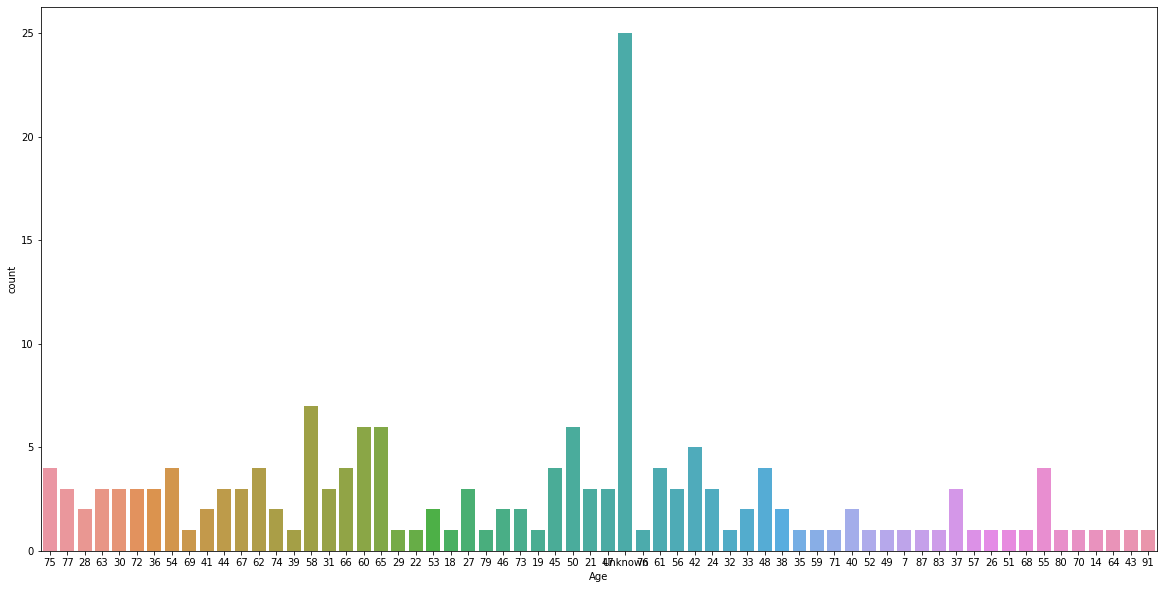

In [84]:
pl.figure(figsize=(20,10))
sns.countplot(temp['Age'])

In [114]:
births = []
for i in temp.Birth:
    if "?" in i:
        year = "Unknown"
    elif "ad," in i:
        a = i.split(" ad", 1)
        b = a[0].split()
        year = int(b[-1])
    elif "bc," in i:
        a = i.split(" bc", 1)
        b = a[0].split()
        year = -int(b[-1])
    elif "," in i:
        a = i.split(",")
        b = a[-2].split()
        c = b[-1].split(".")
        d = c[-1].split("/")
        year = d[-1]
    elif "c." in i:
        a = i.split(".")
        b = a[-1].split()
        try:
            year = int(b[0])
        except:
            year = "Unknown"
            pass
    else:
        a = i.split()
        try:
            year = int(a[-1])
        except:
            year = "Unknown"
            pass
    births.append(year)

#fixing wrong entry    
births[71] = 384    
temp["Births"] = births

In [115]:
temp['Births'].nunique()

127

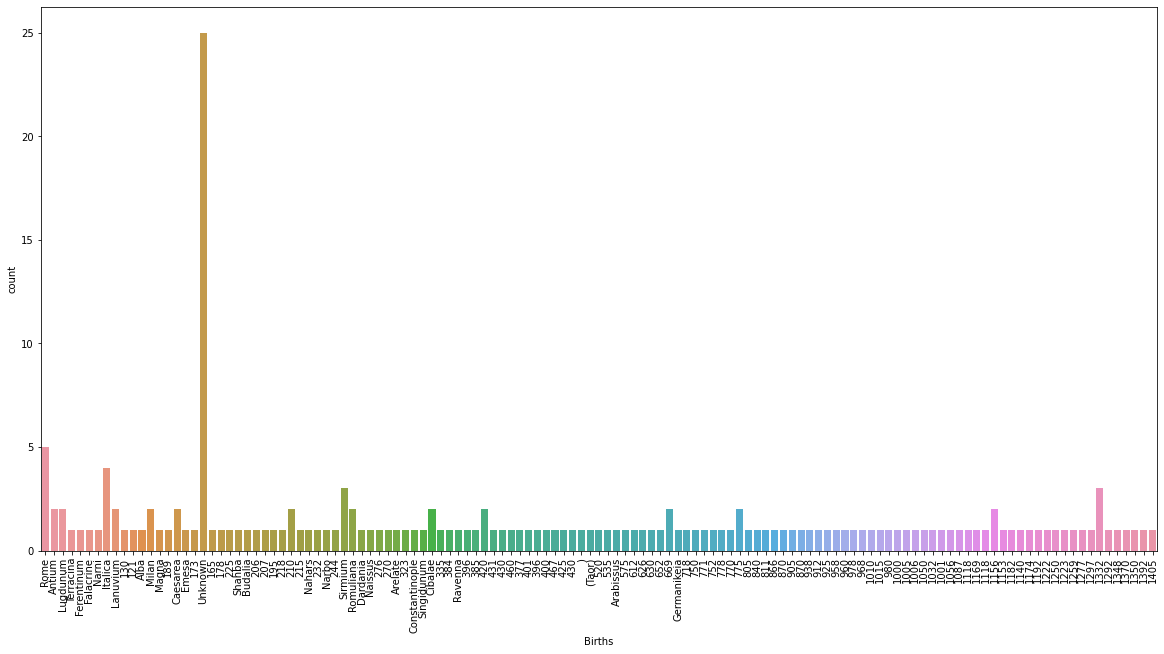

In [116]:
pl.figure(figsize=(20,10))
sns.countplot(temp['Births'])
pl.xticks(rotation=90)
pl.show()

In [175]:
lengths=[]
for i in temp.Time:
    year=0
    month=0
    if 'year' in i:
        a=i.split()[0].split('/')[0]
        year=int(a)
        length=year
        lengths.append(length)
        
    elif 'month' in i:
        a=i.split()[0].split('-')[0]
        if '–' in a:               
            length=int(a[0])
            lengths.append(length)
        else:
            length=int(a)
            lengths.append(length)
#     elif 'day' in i:
#         length=year
#         lengths.append(length)
    else:
        lengths.append('Unknown')
temp['Length']=lengths

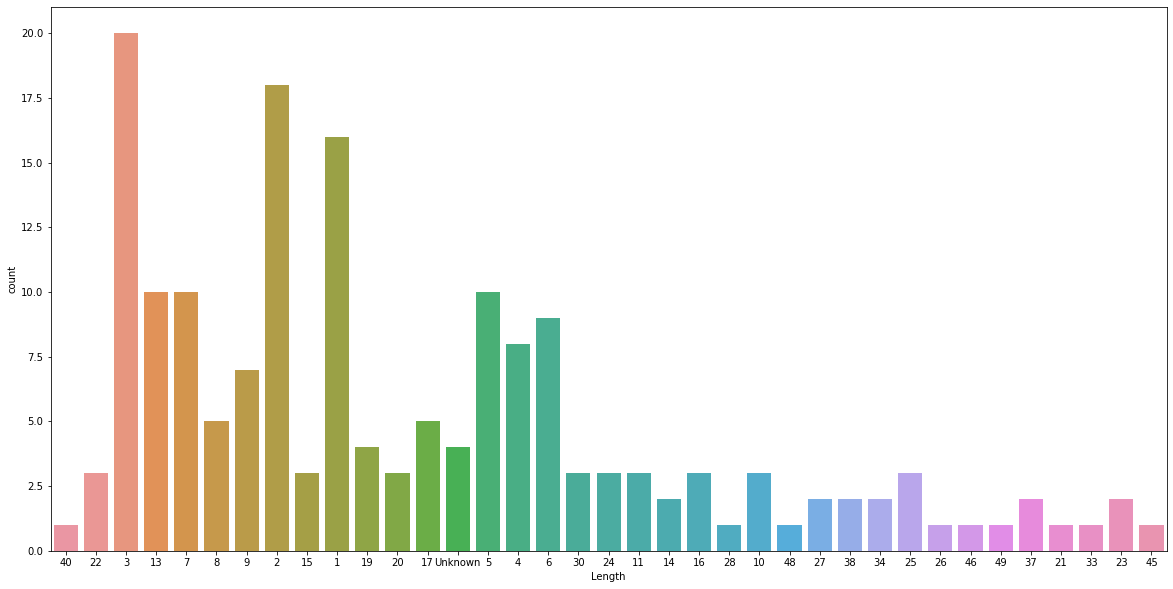

In [176]:
pl.figure(figsize=(20,10))
sns.countplot(temp['Length'])

In [178]:
temp.head()

,Name,Birth,Succession,Reign,Time,Deaths,Cause,Age,Births,Length
0,Augustus,"23 September 63 BC, Rome , Italia \n",Great-nephew and adopted son of Julius Caesa...,16 January 27 BC – 19 August 14 AD\n,"40 years, 7 months and 3 days\n",19 August 14 AD (aged 75) Natural causes \n,Other/Unknown,75,Rome,40
1,Tiberius,"16 November 42 BC, Rome , Italia \n","Natural son of Livia Drusilla , Augustus' th...",18 September 14 AD – 16 March 37 AD\n,"22 years, 5 months and 27 days\n",16 March 37 AD (aged 77) Probably natural cau...,Assassinated,77,Rome,22
2,Caligula,"31 August 12 AD, Antium , Italia \n",Great-nephew and adoptive grandson of Tiberiu...,18 March 37 AD – 24 January 41 AD\n,"3 years, 10 months and 6 days\n",24 January 41 AD (aged 28) Assassinated in a ...,Other/Unknown,28,Antium,3
3,Claudius,"1 August 10 BC, Lugdunum , Gallia Lugdunens...",Uncle of Caligula; brother of Germanicus; nep...,25/26 January 41 AD – 13 October 54 AD\n,"13 years, 8 months and 18/19 days\n",13 October 54 AD (aged 63) Probably poisoned ...,Natural Causes,63,Lugdunum,13
4,Nero,"15 December 37 AD, Antium , Italia \n","Great-nephew, stepson, son-in-law and adopted...",13 October 54 AD – 9 June 68 AD\n,"13 years, 7 months and 27 days\n",9 June 68 AD (aged 30) Committed suicide afte...,Suicide,30,Antium,13


In [225]:
reign_end = []
for i in temp.Reign:
    end = "Unknown"
    if "ad" not in i:
        a = i.split()
        b = a[-1].split("?")
        c = b[-1].split("–")
        try:
            end = int(c[-1])
        except:
            try:
                a = i.split("(")
                b = a[-2].split()
                end = int(b[-1])
            except:
                print(a,b)
                print("")
                pass
            pass
    else:
        a = i.split()
        end = int(a[-2])
    reign_end.append(end)   

temp["End of Reign"] = reign_end

[' 16 January 27 BC – 19 August 14 AD\n'] ['AD']

[' 18 September 14 AD – 16 March 37 AD\n'] ['AD']

[' 18 March 37 AD – 24 January 41 AD\n'] ['AD']

[' 25/26 January 41 AD – 13 October 54 AD\n'] ['AD']

[' 13 October 54 AD – 9 June 68 AD\n'] ['AD']

[' 8 June 68 AD – 15 January 69 AD\n'] ['AD']

[' 15 January 69 AD – 16 April 69 AD\n'] ['AD']

[' 17 April 69 AD – 20 December 69 AD\n'] ['AD']

[' 21 December 69 AD – 24 June 79 AD\n'] ['AD']

[' 24 June 79 AD – 13 September 81 AD\n'] ['AD']

[' 14 September 81 AD – 18 September 96 AD\n'] ['AD']

[' Late July/early August 283 – 284?\n'] ['284', '']

[' 17 December 920 – 16 December 944\n 20 May 921 – August 931 ', 'Christopher) \n 924–945 ', 'Stephen & Constantine) \n \n'] ['Christopher)', '924–945']

[' 22 May 1067 – 31 March 1078\n 1068 – 1070s ', 'Andronikos) \n 1060–1078 ', 'Konstantios) \n 1074–1078 ', 'Constantine) \n \n'] ['Konstantios)', '1074–1078']



In [228]:
temp.head()

,Name,Birth,Succession,Reign,Time,Deaths,Cause,Age,Births,Length,End of Reign
0,Augustus,"23 September 63 BC, Rome , Italia \n",Great-nephew and adopted son of Julius Caesa...,16 January 27 BC – 19 August 14 AD\n,"40 years, 7 months and 3 days\n",19 August 14 AD (aged 75) Natural causes \n,Other/Unknown,75,Rome,40,Unknown
1,Tiberius,"16 November 42 BC, Rome , Italia \n","Natural son of Livia Drusilla , Augustus' th...",18 September 14 AD – 16 March 37 AD\n,"22 years, 5 months and 27 days\n",16 March 37 AD (aged 77) Probably natural cau...,Assassinated,77,Rome,22,Unknown
2,Caligula,"31 August 12 AD, Antium , Italia \n",Great-nephew and adoptive grandson of Tiberiu...,18 March 37 AD – 24 January 41 AD\n,"3 years, 10 months and 6 days\n",24 January 41 AD (aged 28) Assassinated in a ...,Other/Unknown,28,Antium,3,Unknown
3,Claudius,"1 August 10 BC, Lugdunum , Gallia Lugdunens...",Uncle of Caligula; brother of Germanicus; nep...,25/26 January 41 AD – 13 October 54 AD\n,"13 years, 8 months and 18/19 days\n",13 October 54 AD (aged 63) Probably poisoned ...,Natural Causes,63,Lugdunum,13,Unknown
4,Nero,"15 December 37 AD, Antium , Italia \n","Great-nephew, stepson, son-in-law and adopted...",13 October 54 AD – 9 June 68 AD\n,"13 years, 7 months and 27 days\n",9 June 68 AD (aged 30) Committed suicide afte...,Suicide,30,Antium,13,Unknown


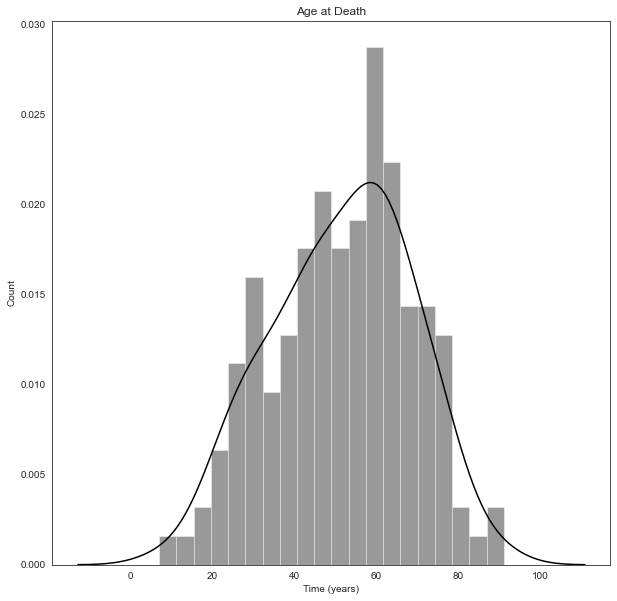

In [235]:
sns.set_style('white')
num_ages=[]
for i in ages:
    if type(i)==int:
        num_ages.append(i)
fig,ax=pl.subplots(figsize=(10,10))
# pl.hist(num_ages,bins=20,color='black')
sns.distplot(num_ages,bins=20,color='black')
ax.set(title = "Age at Death", ylabel = "Count", xlabel = "Time (years)")
pl.show()

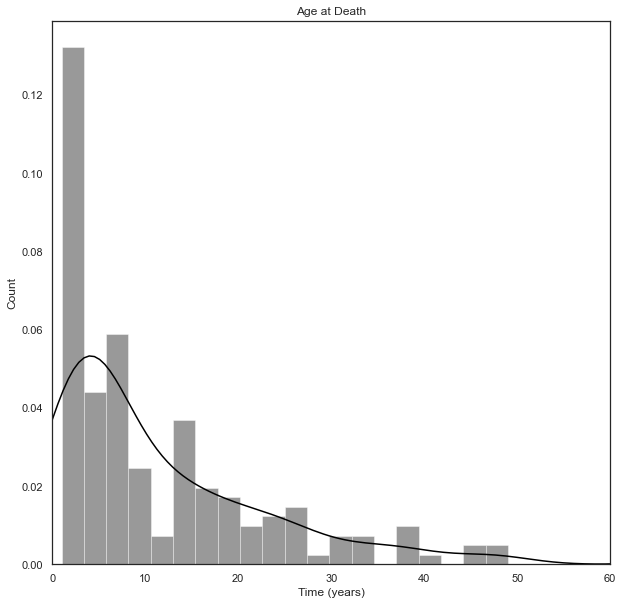

In [252]:
sns.set_style('white')
num_lengths=[]
for i in lengths:
    if type(i)==int:
        num_lengths.append(i)
fig,ax=pl.subplots(figsize=(10,10))
# pl.hist(num_lengths,bins=20,color='black')
sns.distplot(num_lengths,bins=20,color='black')
ax.set(title = "Age at Death", ylabel = "Count", xlabel = "Time (years)")
ax.set(xlim=[0,60])
pl.show()

In [239]:
# palette
green = '#35d0ba'
blue = "#00b8a9"
red = '#d92027'
orange = '#ff9234'
yellow = '#ffcd3c'
yellow2 = "#ffde7d"
beige = "#f8f3d4"
red2 = "#f6416c"
black = "#222831"

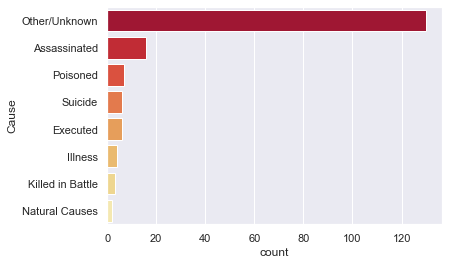

In [249]:
sns.set(palette = "YlOrRd")
sns.countplot(y='Cause',data=temp,
              order=temp['Cause'].value_counts().index,palette="YlOrRd_r")